# Peer - Graded Assignment: The best classifier

## Objectives:

* Using loan applications dataset,
    
    * clean the data, 
    
    * apply different classification algorithm on the data.
 
* Alogorithm used:

    * k-Nearest Neighbour

    * Decision Tree

    * Support Vector Machine

    * Logistic Regression

* The alogorithm will be evaluated using the following metrics:

    * Jaccard index

    * F1-score

    * LogLoass

### About the dataset
**Features of the data**
1. Loan_ID
2. Gender
3. Married
4. Dependents
5. Education
6. Self_Employed
7. ApplicantIncome
8. CoapplicantIncome
9. LoanAmount
10. Loan_Amount_Term
11. Credit_History
12. Property_Area
13. Loan_Status


In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading data
loan_df = pd.read_csv("loan_application.csv", index_col ="Loan_ID")

# View the first 5 rows of the dataset
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# summary of the dataset
loan_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


From the summary of the data, some values are missing

In [5]:
#checking the missing value count of each column
loan_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Drop the missing values from the data set

In [6]:
#drop the missing values and setting inplace to True to mute the dataframe
loan_df.dropna(inplace = True)

In [7]:
# re-checking the dataframe for missing values
loan_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no missing values

In [8]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [9]:
# Checking the data types of each column
loan_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The data must be converted to the same data type (float)
Although the data in Dependents column are numbers but it's data type is object

In [10]:
# viewing the value counts of all data available in the data
loan_df.value_counts()

Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
Female  No       0           Graduate      No             645              3683.0             113.0       480.0             1.0             Rural          Y              1
                                                          1500             1800.0             103.0       360.0             0.0             Semiurban      N              1
Male    Yes      1           Graduate      No             4283             3000.0             172.0       84.0              1.0             Rural          N              1
                                                          3988             0.0                50.0        240.0             1.0             Urban          Y              1
                                                          3875             0.0                67.0        360.0             1.0             Urban

Well now it can be see that there is a value in the Dependents column that is not a numerical value

In [11]:
# replacing the non-numerical value of the dependents column with 3
loan_df["Dependents"] = loan_df["Dependents"].replace("3+", 3)

In [12]:
# Re-checking the data counts
loan_df.value_counts()

Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
Female  No       3           Graduate      No             3083             0.0                255.0       360.0             1.0             Rural          Y              1
                 0           Graduate      No             645              3683.0             113.0       480.0             1.0             Rural          Y              1
Male    Yes      0           Not Graduate  No             2253             2033.0             110.0       360.0             1.0             Rural          Y              1
                                                          2167             2400.0             115.0       360.0             1.0             Urban          Y              1
                                                          1863             1041.0             98.0        360.0             1.0             Semiu

In [13]:
# splitting the data into feature set and the label set
X= loan_df.drop("Loan_Status", axis = 1).values
y= loan_df["Loan_Status"].values

In [14]:
# transforming the categorical data of the feature set into numerical
from sklearn.preprocessing import LabelEncoder

cat_gen = LabelEncoder()
cat_gen.fit(["Male", "Female"])
X[:, 0] = cat_gen.transform(X[:, 0])


cat_mar = LabelEncoder()
cat_mar.fit(["No", "Yes"])
X[:, 1] = cat_mar.transform(X[:, 1])
X[:, 4] = cat_mar.transform(X[:, 4])


cat_edu = LabelEncoder()
cat_edu.fit(["Graduate", "Not Graduate"])
X[:, 3] = cat_edu.transform(X[:, 3])


cat_prop = LabelEncoder()
cat_prop.fit(["Semiurban", "Urban", "Rural"])
X[:, 10] = cat_prop.transform(X[:, 10])


In [16]:
# view the first five rows of the feature set
X[:5]

array([[1, 1, '1', 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0],
       [1, 1, '0', 0, 1, 3000, 0.0, 66.0, 360.0, 1.0, 2],
       [1, 1, '0', 1, 0, 2583, 2358.0, 120.0, 360.0, 1.0, 2],
       [1, 0, '0', 0, 0, 6000, 0.0, 141.0, 360.0, 1.0, 2],
       [1, 1, '2', 0, 1, 5417, 4196.0, 267.0, 360.0, 1.0, 2]],
      dtype=object)

In [17]:
# transforminng label to numerical Y for 1 and N for  0
y= np.asarray([1 if value == "Y" else 0 for value in y])

In [18]:
# Normalize the data feature set convert all to float
from sklearn.preprocessing import StandardScaler
sds = StandardScaler()
X = sds.fit_transform(X, X.astype(float))

In [19]:
# first five after normalizing
X[0:5]

array([[ 0.46719815,  0.73716237,  0.21859918, -0.50325312, -0.3992747 ,
        -0.13796959, -0.02795204, -0.20808917,  0.27554157,  0.41319694,
        -1.31886834],
       [ 0.46719815,  0.73716237, -0.76203265, -0.50325312,  2.50454133,
        -0.4175358 , -0.604633  , -0.97900085,  0.27554157,  0.41319694,
         1.25977445],
       [ 0.46719815,  0.73716237, -0.76203265,  1.98707162, -0.3992747 ,
        -0.49118022,  0.29710022, -0.30756164,  0.27554157,  0.41319694,
         1.25977445],
       [ 0.46719815, -1.35655324, -0.76203265, -0.50325312, -0.3992747 ,
         0.11228014, -0.604633  , -0.04644639,  0.27554157,  0.41319694,
         1.25977445],
       [ 0.46719815,  0.73716237,  1.19923101, -0.50325312,  2.50454133,
         0.00931924,  0.99997795,  1.52024509,  0.27554157,  0.41319694,
         1.25977445]])

In [20]:
#splitting the data in to trainset 70% and testset 20%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.2, random_state=3)

In [21]:
# fitting the K-Nearest Neighbor algorithm on the train set with n_neighbor parameter to be 3
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# Predictting on the fitted model
y_pred = neigh.predict(X_test)

In [23]:
# The predicted label
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1])

In [24]:
# The actual label
Y_test

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0])

In [25]:
# Evaluating the model using Jaccard_score, f1_score, log_loss
from sklearn.metrics import jaccard_score, f1_score, log_loss

kjaccard = jaccard_score(Y_test, y_pred)
kf1 = f1_score(Y_test, y_pred)
klglss = log_loss(Y_test, y_pred)
print ('Jaccard_score:', kjaccard)
print ('f1_score:', kf1)
print ('log_loss:', klglss)

Jaccard_score: 0.6951219512195121
f1_score: 0.8201438848920862
log_loss: 8.994647931445845


In [26]:
# Refitting the KNN the train set for range of n_neighbor values to optimize the model
ks = 10
# creating 0 value list for the different evaluation metrics
kjd_score = np.zeros((ks-1))
kf1score = np.zeros((ks-1))
klg_loss= np.zeros((ks-1))

# loopign through the different n_neighbor values
for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors = n)
    
    # fitting the model on the different n_neighbor values
    neigh.fit(X_train, Y_train)
    
    # making prediction
    y_pred = neigh.predict(X_test)
    
    # assigning the metric values to the 0 values list created
    kjd_score[n-1] = jaccard_score(Y_test, y_pred)
    kf1score[n-1] = f1_score(Y_test, y_pred)
    klg_loss[n-1] = log_loss(Y_test, y_pred)
    
    
print ('Jaccard_score:', kjd_score)
print ('f1_score:', kf1score)
print ('log_loss:', klg_loss)

Jaccard_score: [0.57317073 0.55128205 0.69512195 0.67901235 0.70731707 0.70731707
 0.7195122  0.7195122  0.7195122 ]
f1_score: [0.72868217 0.7107438  0.82014388 0.80882353 0.82857143 0.82857143
 0.83687943 0.83687943 0.83687943]
log_loss: [12.59243714 12.59240382  8.99464793  9.35441852  8.63486901  8.63486901
  8.27509009  8.27509009  8.27509009]


**The model perform very well for n_neighbor values 0f `7` , `8`, `9`**

# Decision Tree

In [27]:
# Fitting DecisionTreeClassifier algorithm on the train set with criterion para to be "entropy" and max_depth to be 4
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
#Making prediction on the model
tree_pred = dtc.predict(X_test)

In [29]:
# The predicted label
tree_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
# The actual label
Y_test

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0])

In [31]:
# Evaluating the decision tree model
tjaccard = jaccard_score(Y_test, tree_pred)
tf1 = f1_score(Y_test, tree_pred)
tlglss = log_loss(Y_test, tree_pred)
print ('Jaccard_score:', tjaccard)
print ('f1_score:', tf1)
print ('log_loss:', tlglss)

Jaccard_score: 0.6829268292682927
f1_score: 0.8115942028985508
log_loss: 9.354426852226164


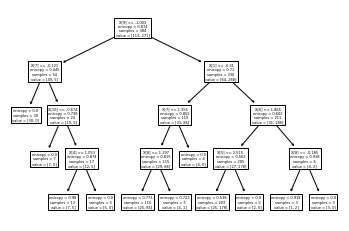

In [32]:
# Plotting the model
from sklearn.tree import plot_tree
plot_tree(dtc);

In [33]:
# Refitting the model on with different max_depth values
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=6)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [34]:
tree_pred = dtc.predict(X_test)

In [35]:
tree_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
Y_test

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0])

In [37]:
# Evaluating
tjaccard = jaccard_score(Y_test, tree_pred)
tf1 = f1_score(Y_test, tree_pred)
tlglss = log_loss(Y_test, tree_pred)
print ('Jaccard_score:', tjaccard)
print ('f1_score:', tf1)
print ('log_loss:', tlglss)

Jaccard_score: 0.6666666666666666
f1_score: 0.8000000000000002
log_loss: 10.0740013520666


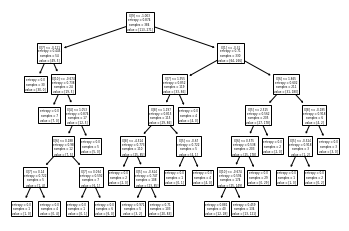

In [38]:
# plotting the tree
plot_tree(dtc);


In [39]:
# Max_depth value of 3
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc.fit(X_train, Y_train)
tree_pred = dtc.predict(X_test)
tjaccard = jaccard_score(Y_test, tree_pred)
tf1 = f1_score(Y_test, tree_pred)
tlglss = log_loss(Y_test, tree_pred)
print ('Jaccard_score:', tjaccard)
print ('f1_score:', tf1)
print ('log_loss:', tlglss)

Jaccard_score: 0.6951219512195121
f1_score: 0.8201438848920862
log_loss: 8.994647931445845


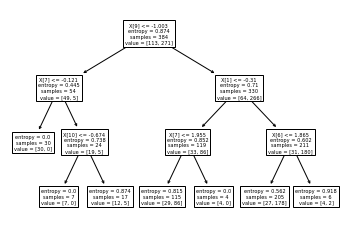

In [40]:
plot_tree(dtc);

In [41]:
# max_depth value of 2
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dtc.fit(X_train, Y_train)
tree_pred = dtc.predict(X_test)
tjaccard = jaccard_score(Y_test, tree_pred)
tf1 = f1_score(Y_test, tree_pred)
tlglss = log_loss(Y_test, tree_pred)
print ('Jaccard_score:', tjaccard)
print ('f1_score:', tf1)
print ('log_loss:', tlglss)

Jaccard_score: 0.7195121951219512
f1_score: 0.8368794326241135
log_loss: 8.275090089885206


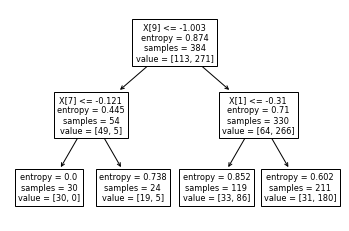

In [284]:
plot_tree(dtc);

In [42]:
# max_depth of 1
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=1, )
dtc.fit(X_train, Y_train)
tree_pred = dtc.predict(X_test)
tjaccard = jaccard_score(Y_test, tree_pred)
tf1 = f1_score(Y_test, tree_pred)
tlglss = log_loss(Y_test, tree_pred)
print ('Jaccard_score:', tjaccard)
print ('f1_score:', tf1)
print ('log_loss:', tlglss)

Jaccard_score: 0.7195121951219512
f1_score: 0.8368794326241135
log_loss: 8.275090089885206


In [43]:
# criterion to be "gini"
dtc = DecisionTreeClassifier(criterion="gini", max_depth=2, )
dtc.fit(X_train, Y_train)
tree_pred = dtc.predict(X_test)
tjaccard = jaccard_score(Y_test, tree_pred)
tf1 = f1_score(Y_test, tree_pred)
tlglss = log_loss(Y_test, tree_pred)
print ('Jaccard_score:', tjaccard)
print ('f1_score:', tf1)
print ('log_loss:', tlglss)

Jaccard_score: 0.6867469879518072
f1_score: 0.8142857142857143
log_loss: 9.354435181366064


An increase in the max_depth value of the decision tree classifier gives a not so good evaluation score for the model
for max_depth values of `2` and `1` the model has a relatively good evaluation score
a chamge in the decision tree criterion also gives a bad evaluation score

# Support Vector Machine

In [44]:
# Fitting the SupportVectorClassifier algorithm on the train set with regulariztion value C = 0.1
from sklearn.svm import SVC
clf = SVC(C=0.1)
clf.fit(X_train, Y_train)

# making prediction SVC model
svc_pred = clf.predict(X_test)

# Evaluatin the model
sjaccard = jaccard_score(Y_test, tree_pred)
sf1 = f1_score(Y_test, tree_pred)
slglss = log_loss(Y_test, tree_pred)
print ('Jaccard_score:', sjaccard)
print ('f1_score:', sf1)
print ('log_loss:', slglss)

Jaccard_score: 0.6867469879518072
f1_score: 0.8142857142857143
log_loss: 9.354435181366064


In [57]:
# regulariztion value C = 0.2
from sklearn.svm import SVC
clf = SVC(C=1, kernel="linear")
clf.fit(X_train, Y_train)

# making prediction SVC model
svc_pred = clf.predict(X_test)

# Evaluatin the model
sjaccard = jaccard_score(Y_test, tree_pred)
sf1 = f1_score(Y_test, tree_pred)
slglss = log_loss(Y_test, tree_pred)
print ('Jaccard_score:', sjaccard)
print ('f1_score:', sf1)
print ('log_loss:', slglss)

Jaccard_score: 0.6867469879518072
f1_score: 0.8142857142857143
log_loss: 9.354435181366064


A decrease or increase in the C values does not improve the evaluation score

A change of the Kernel value from default `"rbf"` to `"poly"` , to `"sigmoid"` also does not improve the evaluation metrics used.

So far the support vector machine perform relatively poor compare to the algorithms used.

# Logistic Regression


In [55]:
# fitting the Logistic Regrssion algorithm on the train set
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, Y_train)


# Making prediction
lgr_pred = lgr.predict(X_test)


# Evaluating the model
ljaccard = jaccard_score(Y_test, lgr_pred)
lf1 = f1_score(Y_test, lgr_pred)
llglss = log_loss(Y_test, lgr_pred)
print ('Jaccard_score:', ljaccard)
print ('f1_score:', lf1)
print ('log_loss:', llglss)

Jaccard_score: 0.7195121951219512
f1_score: 0.8368794326241135
log_loss: 8.275090089885206


`k-Nearest Neighbour` `Decision Tree` `Logistic Regression` all provided the same evaluation score on the jaccard_score, f1_score, and log_loss metrics
even after tunning some of the algorithm's hyper-parameters

* Jaccard_score: 0.7195121951219512
* f1_score: 0.8368794326241135
* log_loss: 8.275090089885206

`Support Vector Machine` perform relatively lower on the evaluation score than the other algorithm used 
* Jaccard_score: 0.6867469879518072
* f1_score: 0.8142857142857143
* log_loss: 9.354435181366064
even after tunning some of it's hyper-parameters

from my work best classifier will any of these three `k-Nearest Neighbour` `Decision Tree` `Logistic Regression`